# Bioenergy from Eurostat's SHARES database (selected countries)

Data from the tsv tables accessed from the [Energy database](https://ec.europa.eu/eurostat/web/energy/data/database) under energy indicators as 'Share of energy from renewable sources until 2020' (nrg_ind_share). Three tsv tables for each sector (electricity, heating and cooling, transport).

Here are only selected countries for a research I am currently doing. 

I will work on a tidier version of the output csv tables in another notebook.

Very helpful are [Standard international energy product classification (SIEC)](http://dd.eionet.europa.eu/vocabulary/eurostat/siec/) vocabulary and [Energy balance](http://dd.eionet.europa.eu/vocabulary/eurostat/nrg_bal/) vocabulary.

## Fuels
Biomass-based fuels I cover here (SIEC codes in brackets):
* Primary solid biofuels (R5110-5150_W6000RI)
* Biogases (R5300)
* Liquid biofuels (R5200)
* Renewable municipal waste (W6210)

## Variables
If I understand it correctly in the SHARES database in the **electricity sector** I should look for 'Gross electricity generation' for biomass-based fuels, in the **heating sector** it seems as a sum of 'Final consumption in industry and others sectors' and 'Gross heat production' and in the **transport sector** the variables are probably 'Final consumption' variable for road, rail and other sectors.

Depending on the sector (electricity, heating and cooling, transport) we are interested in the following variables:

### Electricity
* Gross electricity production - Renewable Energy Directive (GEP_RED)

### Heating and cooling
* Gross heat production - Renewable Energy Directive (GHP_RED)
* Final consumption - industry and other sectors - energy use (FC_IND_OTH_E)

### Transport
* Final consumption - other transport sector- energy use - Renewable Energy Directive (FC_TRA_OTH_E_RED)
* Final consumption - transport sector - road - energy use - Renewable Energy Directive (FC_TRA_ROAD_E_RED)
* Final consumption - transport sector - rail - energy use - Renewable Energy Directive (FC_TRA_RAIL_E_RED)

Disclaimer: I might got something wrong. I still have to go through the whole [Energy balance guide](https://ec.europa.eu/eurostat/documents/38154/4956218/ENERGY-BALANCE-GUIDE-DRAFT-31JANUARY2019.pdf/cf121393-919f-4b84-9059-cdf0f69ec045). I hope I do not aggregate variables which should be kept separate or miss some variable to add it to the bioenergy totals.



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_output_dir = 'output'

if not os.path.exists(csv_output_dir):
    os.mkdir(csv_output_dir)

In [3]:
# Standard international energy product classification (SIEC)
# https://dd.eionet.europa.eu
# Dictionary from siec codes to human readable labels
siec = pd.read_csv('siec.csv')
siec
fuels_dict = {k: v for k, v in zip(siec['Label'], siec['Notation'])}

In [4]:
# We are interested in renewables and bioenergy
selected_fuels = [
    'Total',
    'Renewables and biofuels',
    'Primary solid biofuels',
    'Biogases',
    'Liquid biofuels',
    'Renewable municipal waste',
    ]

selected_fuels = [
    'Primary solid biofuels',
    'Biogases',
    'Liquid biofuels',
    'Renewable municipal waste',
    ]

selected_fuel_codes = [v for k,v in fuels_dict.items() if k in selected_fuels]

selected_countries = ['AT', 'CZ', 'DK', 'NL', 'PL', 'SK']

In [5]:
selected_fuel_codes

['R5110-5150_W6000RI', 'R5200', 'R5300', 'W6210']

## Electricity

In [6]:
# The source file is hybrid with tabs and commas as separators
el = pd.read_table('nrg_ind_ured.tsv', delimiter='[\t,]+')
el.rename(columns={'geo\\time': 'geo'}, inplace=True)
el.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
el.rename(columns={'2004': 2004}, inplace=True)

In [7]:
el.head()

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,E7000,GEP_NPUMP_MIX,GWH,AL,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
1,E7000,GEP_NPUMP_MIX,GWH,AT,3574.539,2958.855,3877.193,3748.451,4375.092,4403.564,4626.926,3100.056,3832.03,4419.345,3832.019,3925.298,3263.976,3965.61,3754.119
2,E7000,GEP_NPUMP_MIX,GWH,BA,336.000,81.000,111.000,242.000,173.000,713.000,239.000,149.000,794.00,386.000,115.000,102.000,316.000,0.00,0.000
3,E7000,GEP_NPUMP_MIX,GWH,BE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
4,E7000,GEP_NPUMP_MIX,GWH,BG,717.301,244.947,444.000,391.000,335.000,296.000,261.000,364.000,670.00,465.000,379.000,374.000,600.000,566.00,464.000


In [8]:
# https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas

needed_countries = el['geo'].str.fullmatch('|'.join(selected_countries))
needed_fuels = el['siec'].str.fullmatch('|'.join(selected_fuel_codes))
gep = el['nrg_bal'].str.fullmatch('GEP_RED')

In [9]:
el[needed_countries & needed_fuels].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
121,R5110-5150_W6000RI,GEP_RED,GWH,AT,3965.583,3934.744,3783.520,3711.788,3603.280,3817.831,3797.430,3711.060,3590.280,3413.972,3316.313,3163.529,2544.535,1927.129,1699.639
761,W6210,GEP_RED,GWH,AT,335.804,315.521,330.364,302.241,331.019,255.089,239.598,211.580,213.963,214.075,203.972,222.010,210.903,140.273,131.891
361,R5300,GEP_RED,GWH,AT,628.313,670.346,665.712,633.524,613.294,622.787,641.672,625.115,646.155,608.603,601.945,601.994,411.691,310.980,58.909
126,R5110-5150_W6000RI,GEP_RED,GWH,CZ,2120.884,2213.397,2067.744,2091.495,1992.218,1683.272,1817.337,1684.571,1492.239,1396.262,1170.527,968.062,731.066,560.252,564.546
766,W6210,GEP_RED,GWH,CZ,100.189,114.318,98.563,86.651,87.945,83.842,86.685,90.190,35.586,10.937,11.684,11.975,11.264,10.612,10.031
366,R5300,GEP_RED,GWH,CZ,2607.205,2639.263,2589.023,2610.964,2583.363,2293.592,1467.684,928.714,634.662,441.265,266.868,215.222,175.837,160.857,138.794
768,W6210,GEP_RED,GWH,DK,860.074,883.621,860.847,918.696,885.110,873.953,892.087,951.216,912.900,969.000,1045.000,972.000,1006.000,998.000,792.000
368,R5300,GEP_RED,GWH,DK,619.795,581.901,498.403,460.578,450.834,381.998,377.558,345.949,356.326,363.000,291.000,304.000,284.000,281.000,281.000
128,R5110-5150_W6000RI,GEP_RED,GWH,DK,4417.779,4796.961,3483.213,2796.176,2958.613,3056.461,3176.307,3077.696,3323.861,1987.000,1803.000,1828.000,1778.000,1894.000,1834.000
388,R5300,GEP_RED,GWH,NL,886.927,923.263,992.817,1035.831,1005.488,979.855,1008.669,1035.471,1027.838,915.682,733.399,511.068,361.409,294.628,292.723


In [10]:
bioel = el[needed_countries & needed_fuels & gep].groupby(['geo']).sum() * 3.6 / 41.868
bioel = bioel.transpose().sort_index()
bioel

geo,AT,CZ,DK,NL,PL,SK
2004,162.548495,61.338865,249.957008,251.897420,84.500774,1.719690
2005,204.504041,62.916681,272.828891,327.374549,129.933534,2.751505
2006,272.324076,78.948151,263.800516,302.108770,171.349097,34.248839
2007,342.866122,102.773775,266.895959,333.308684,219.739811,40.756664
2008,354.447979,124.598366,269.905417,404.543594,311.111952,44.453998
2009,364.286328,158.939295,285.382631,519.135426,449.127515,46.173689
2010,382.665348,185.940413,394.934394,600.902666,542.011178,56.921754
2011,391.036543,232.457008,376.170335,605.892347,653.440327,70.421324
2012,402.295787,289.914531,382.283061,619.423474,867.932072,80.911436
2013,403.758126,349.157868,370.800688,511.984265,741.318659,78.331900


In [11]:
# TJ
bioel_tj = bioel * 41.868

<AxesSubplot:title={'center':'Bioelectricity'}, xlabel='year', ylabel='GEP_RED (ktoe)'>

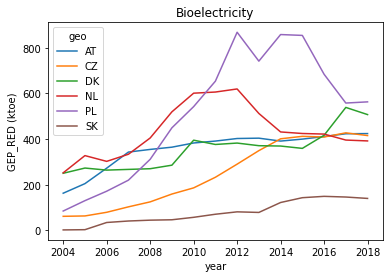

In [12]:
bioel.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioelectricity_ktoe.csv'), decimal=','
)
bioel_tj.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioelectricity_tj.csv'), decimal=','
)

bioel.plot(title='Bioelectricity', ylabel='GEP_RED (ktoe)', xlabel='year')

## Heating and cooling sector

In [13]:
hc = pd.read_table('nrg_ind_urhcd.tsv', delimiter='[\t,]+')
hc.rename(columns={'geo\\time': 'geo'}, inplace=True)
hc.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
hc.rename(columns={'2004': 2004}, inplace=True)

for col in range(2004,2019):
    hc[col] = pd.to_numeric(hc[col], errors='coerce')

needed_countries = hc['geo'].str.fullmatch('|'.join(selected_countries))
needed_fuels = hc['siec'].str.fullmatch('|'.join(selected_fuel_codes))
ghp = hc['nrg_bal'].str.fullmatch('GHP_RED')
fc = hc['nrg_bal'].str.fullmatch('FC_IND_OTH_E')
hc[needed_countries & needed_fuels & (fc | ghp)].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
1,R5110-5150_W6000RI,FC_IND_OTH_E,KTOE,AT,3016.202,3238.780,3178.363,3068.988,2986.975,3290.316,3180.328,3078.953,3229.346,2931.640,2906.921,2937.199,2803.397,2654.562,2297.650
1001,W6210,FC_IND_OTH_E,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
481,R5300,GHP_RED,KTOE,AT,7.060,3.813,5.850,3.471,4.642,6.340,7.133,6.856,7.344,6.868,9.517,8.495,7.921,5.341,1.863
441,R5300,FC_IND_OTH_E,KTOE,AT,37.439,51.992,48.107,46.397,44.279,35.195,32.214,24.530,21.796,17.630,26.219,17.740,14.575,19.437,8.551
41,R5110-5150_W6000RI,GHP_RED,KTOE,AT,871.660,902.131,847.381,846.176,805.067,836.869,838.954,763.560,722.770,580.464,530.559,407.703,335.334,263.837,250.669
1041,W6210,GHP_RED,KTOE,AT,64.277,65.469,61.776,57.417,50.630,46.562,49.186,53.784,48.582,42.634,33.963,29.739,27.426,27.694,28.470
1046,W6210,GHP_RED,KTOE,CZ,40.165,40.560,35.851,37.308,37.499,35.516,35.922,33.773,25.270,33.510,35.946,37.141,36.400,35.325,36.257
46,R5110-5150_W6000RI,GHP_RED,KTOE,CZ,161.939,171.034,160.672,153.196,139.032,119.495,70.316,71.367,58.708,49.847,45.428,40.078,37.762,52.403,145.242
486,R5300,GHP_RED,KTOE,CZ,17.461,17.158,14.331,14.880,13.495,11.632,8.718,7.237,6.114,4.180,3.845,3.081,2.245,2.460,2.508
1006,W6210,FC_IND_OTH_E,KTOE,CZ,22.796,22.269,21.902,23.168,21.544,22.714,20.493,20.541,21.042,8.360,11.011,10.629,10.032,11.130,12.468


In [14]:
biohc = hc[needed_countries & needed_fuels & (fc | ghp)].groupby('geo').sum()
biohc = biohc.transpose().sort_index()
biohc

geo,AT,CZ,DK,NL,PL,SK
2004,2587.203,1660.672,1573.994,628.560,3935.633,344.989
2005,2970.871,1724.586,1734.188,664.421,3856.095,360.203
2006,3188.653,1779.808,1812.937,718.636,3935.846,311.671
2007,3400.876,1848.070,2016.600,736.302,3920.177,409.166
2008,3507.179,1901.356,2079.488,772.537,4011.942,399.183
2009,3579.236,2002.699,2120.283,818.360,4159.167,513.639
2010,4029.838,2098.164,2407.420,848.977,4608.270,536.854
2011,3927.683,2162.057,2316.364,890.146,4880.243,552.307
2012,4107.815,2285.946,2345.785,910.871,5016.791,519.370
2013,4215.282,2474.587,2409.527,953.569,5219.068,473.153


In [15]:
biohc_tj = biohc * 41.868

<AxesSubplot:title={'center':'Bioheat'}, xlabel='year', ylabel='FC_IND_OTH_E + GHP_RED (ktoe)'>

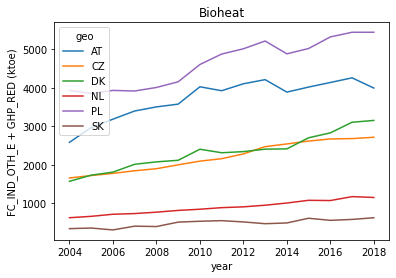

In [16]:
biohc.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioheat_ktoe.csv'), decimal=',')

biohc_tj.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioheat_tj.csv'), decimal=',')

biohc.plot(title='Bioheat', ylabel='FC_IND_OTH_E + GHP_RED (ktoe)', xlabel='year')

## Transport

In [17]:
tr = pd.read_table('nrg_ind_urtd.tsv', delimiter='[\t,]+')
tr.rename(columns={'geo\\time': 'geo'}, inplace=True)
tr.rename(columns={str(year) + ' ': year for year in range(2004, 2019)}, inplace=True)
tr.rename(columns={'2004': 2004}, inplace=True)

for col in range(2004,2019):
    tr[col] = pd.to_numeric(tr[col], errors='coerce')

needed_countries = tr['geo'].str.fullmatch('|'.join(selected_countries))
needed_fuels = tr['siec'].str.fullmatch('|'.join(selected_fuel_codes))
# fc = tr['nrg_bal'].str.contains('FC_TRA_')
selected_variables = ['FC_TRA_OTH_E_RED', 'FC_TRA_RAIL_E_RED', 'FC_TRA_ROAD_E_RED']
fc = tr['nrg_bal'].str.fullmatch('|'.join(selected_variables))

tr[needed_countries & needed_fuels & fc].sort_values('geo')

,siec,nrg_bal,unit,geo,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
361,R5200,FC_TRA_OTH_E_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1761,R5300,FC_TRA_RAIL_E_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1721,R5300,FC_TRA_OTH_E_RED,KTOE,AT,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
441,R5200,FC_TRA_ROAD_E_RED,KTOE,AT,469.607,476.126,540.636,650.676,593.875,499.918,488.088,495.108,492.312,507.949,392.807,319.731,253.938,73.258,0.000
401,R5200,FC_TRA_RAIL_E_RED,KTOE,AT,1.860,2.051,2.464,2.451,2.570,2.357,2.864,2.666,3.109,3.165,2.402,2.364,2.125,0.509,0.000
1801,R5300,FC_TRA_ROAD_E_RED,KTOE,AT,0.378,0.275,0.411,0.416,0.550,0.018,0.011,0.007,0.002,0.001,0.000,0.000,0.000,0.000,0.000
1806,R5300,FC_TRA_ROAD_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
406,R5200,FC_TRA_RAIL_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1726,R5300,FC_TRA_OTH_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1766,R5300,FC_TRA_RAIL_E_RED,KTOE,CZ,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [18]:
biotr = tr[needed_countries & needed_fuels & fc].groupby('geo').sum()
biotr = biotr.transpose().sort_index()
biotr

geo,AT,CZ,DK,NL,PL,SK
2004,0.000,0.000,0.000,0.000,13.543,1.00
2005,73.767,0.000,0.000,0.000,49.664,11.17
2006,256.063,0.000,3.826,42.179,90.592,40.17
2007,322.095,0.000,5.739,311.232,96.699,59.49
2008,395.209,109.941,5.102,287.767,437.060,72.27
2009,511.115,194.779,8.684,372.732,635.888,84.45
2010,495.423,231.251,26.784,228.748,867.425,96.59
2011,497.781,300.110,130.489,329.246,915.535,100.27
2012,490.963,275.270,226.605,321.721,807.349,94.15
2013,502.293,277.109,226.605,306.594,747.531,102.11


In [19]:
biotr_tj = biotr * 41.868
biotr_tj

geo,AT,CZ,DK,NL,PL,SK
2004,0.000000,0.000000,0.000000,0.000000,567.018324,41.86800
2005,3088.476756,0.000000,0.000000,0.000000,2079.332352,467.66556
2006,10720.845684,0.000000,160.186968,1765.950372,3792.905856,1681.83756
2007,13485.473460,0.000000,240.280452,13030.661376,4048.593732,2490.72732
2008,16546.610412,4603.009788,213.610536,12048.228756,18298.828080,3025.80036
2009,21399.362820,8155.007172,363.581712,15605.543376,26623.358784,3535.75260
2010,20742.370164,9682.016868,1121.392512,9577.221264,36317.349900,4044.03012
2011,20841.094908,12565.005480,5463.313452,13784.871528,38331.619380,4198.10436
2012,20555.638884,11525.004360,9487.498140,13469.814828,33802.087932,3941.87220
2013,21030.003324,11601.999612,9487.498140,12836.477592,31297.627908,4275.14148


<AxesSubplot:title={'center':'Biotransport'}, xlabel='year', ylabel=' FC_TRA_ROAD_E_RED (ktoe)'>

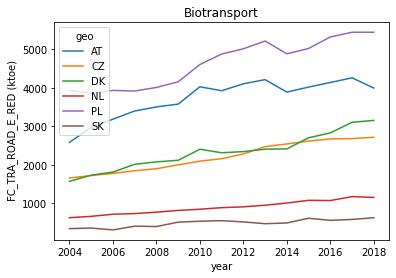

In [20]:
biotr.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'biotrans_ktoe.csv'), decimal=',')
biotr_tj.to_csv(os.path.join(os.path.abspath(csv_output_dir),'biotrans_tj.csv'), decimal=',')

biohc.plot(title='Biotransport', ylabel=' FC_TRA_ROAD_E_RED (ktoe)', xlabel='year')

## Bioenergy (all sectors)

<AxesSubplot:title={'center':'Bioenergy'}, xlabel='year', ylabel=' Bioenergy from SHARES (ktoe)'>

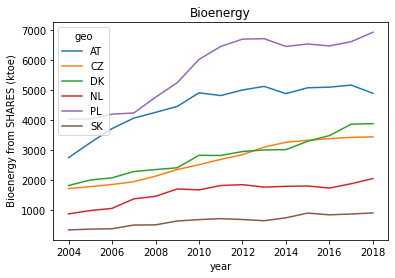

In [21]:
bioenergy = bioel + biohc + biotr
bioenergy_tj = bioenergy * 41.868

bioenergy.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioenergy_ktoe.csv'), decimal=',')
bioenergy_tj.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioenergy_tj.csv'), decimal=',')

bioenergy.plot(title='Bioenergy', ylabel=' Bioenergy from SHARES (ktoe)', xlabel='year')